# ANN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/Tubes AI

/content/drive/My Drive/Tubes AI


In [4]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from PIL import ImageFilter
from imutils import paths
import numpy as np
import os

In [9]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Cocoa Ripeness Dataset")
data = []
labels = []

[INFO] loading images...


In [10]:
for imagePath in imagePaths:
  image=Image.open(imagePath)
  image=image.filter(ImageFilter.SMOOTH)
  image = image.filter(ImageFilter.SMOOTH_MORE)
  image=np.array(image.resize((64,64))) / 255.0
  data.append(image)
  label=imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [11]:
print(labels)

['Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Mature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature', 'Overmature

In [12]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [13]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [14]:
print(np.array(data).shape)

(391, 64, 64, 3)


In [15]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.15)
print(trainX.shape)
print(testX.shape)

(332, 64, 64, 3)
(59, 64, 64, 3)


In [17]:
trainX = trainX.reshape(332,3*64*64)
testX = testX.reshape(59,3*64*64)

In [18]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout
#from keras.layers import Conv2D, MaxPooling2D

model = Sequential(
    [
     Flatten(input_shape=(64*64*3,)),
     Dense(100, activation="relu"),
     Dense(100, activation="relu"),
     Dense(50, activation="relu"),
     Dense(3, activation="softmax"),
    ]
)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 100)               1228900   
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 3)                 153       
                                                                 
Total params: 1,244,203
Trainable params: 1,244,203
Non-trainable params: 0
_________________________________________________________________


In [20]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

[INFO] training network...
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 55ms/step - loss: 1.2648 - accuracy: 0.7048 - val_loss: 0.5913 - val_accuracy: 0.7458
Epoch 2/100
11/11 [==============================] - 0s 23ms/step - loss: 0.4590 - accuracy: 0.8404 - val_loss: 0.4818 - val_accuracy: 0.8475
Epoch 3/100
11/11 [==============================] - 0s 26ms/step - loss: 0.5213 - accuracy: 0.7831 - val_loss: 0.5138 - val_accuracy: 0.8305
Epoch 4/100
11/11 [==============================] - 0s 24ms/step - loss: 0.4670 - accuracy: 0.8554 - val_loss: 0.5493 - val_accuracy: 0.8136
Epoch 5/100
11/11 [==============================] - 0s 26ms/step - loss: 0.3900 - accuracy: 0.8614 - val_loss: 0.4272 - val_accuracy: 0.8475
Epoch 6/100
11/11 [==============================] - 0s 23ms/step - loss: 0.3722 - accuracy: 0.8584 - val_loss: 0.5069 - val_accuracy: 0.8305
Epoch 7/100
11/11 [==============================] - 0s 26ms/step - loss: 0.3519 - accuracy: 0.8735 - val_loss: 0.4289 - val_accuracy: 0.8644
Epoch 8/100
11/11 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


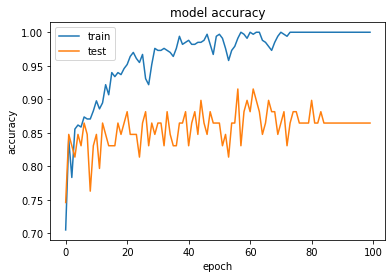

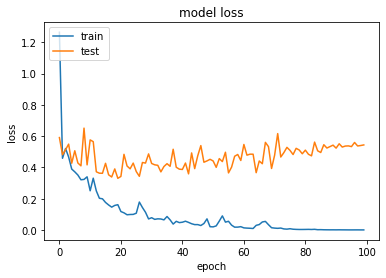

In [21]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    Immature       0.88      1.00      0.94        29
      Mature       0.71      0.50      0.59        10
  Overmature       0.89      0.85      0.87        20

    accuracy                           0.86        59
   macro avg       0.83      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59



TypeError: ignored

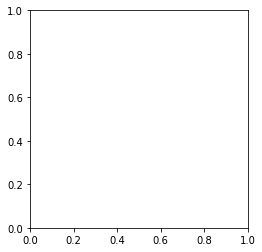

In [23]:
import cv2
import matplotlib.pyplot as plt

gambar = 'Salinan S5.jpg'
image = cv2.imread(gambar)
plt.imshow(image)
plt.show()

In [ ]:
image_test=Image.open(gambar)
image_test=np.array(image_test.resize((64,64))) / 255.0
image_test.shape

(64, 64, 3)

In [ ]:
image_test=np.expand_dims(image_test, axis=0)
image_test.shape

(1, 64, 64, 3)

In [ ]:
image_test = image_test.reshape(1 ,3*64*64)

In [ ]:
predict = model.predict(image_test)
print(predict)

[[7.9784343e-07 9.0738946e-01 9.2609741e-02]]


In [ ]:
print(lb.classes_[predict.argmax(axis=1)])

['Mature']


## `ANN Dropout` (Untuk Mengurangi Overfitting)

In [28]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout
#from keras.layers import Conv2D, MaxPooling2D

model = Sequential(
    [
     Flatten(input_shape=(64*64*3,)),
     Dense(100, activation="relu"),
     Dropout(0.3),
     Dense(100, activation="relu"),
     Dropout(0.3),
     Dense(50, activation="relu"),
     Dense(3, activation="softmax"),
    ]
)

In [29]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

[INFO] training network...
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


11/11 [==============================] - 1s 28ms/step - loss: 1.7386 - accuracy: 0.4819 - val_loss: 0.8122 - val_accuracy: 0.7627
Epoch 2/100
11/11 [==============================] - 0s 18ms/step - loss: 0.7847 - accuracy: 0.7319 - val_loss: 0.5355 - val_accuracy: 0.8305
Epoch 3/100
11/11 [==============================] - 0s 24ms/step - loss: 0.6233 - accuracy: 0.7922 - val_loss: 0.4990 - val_accuracy: 0.8136
Epoch 4/100
11/11 [==============================] - 0s 22ms/step - loss: 0.5692 - accuracy: 0.7861 - val_loss: 0.4844 - val_accuracy: 0.8305
Epoch 5/100
11/11 [==============================] - 0s 22ms/step - loss: 0.5680 - accuracy: 0.8012 - val_loss: 0.5071 - val_accuracy: 0.8136
Epoch 6/100
11/11 [==============================] - 0s 26ms/step - loss: 0.4624 - accuracy: 0.8283 - val_loss: 0.4951 - val_accuracy: 0.8475
Epoch 7/100
11/11 [==============================] - 0s 22ms/step - loss: 0.4651 - accuracy: 0.8373 - val_loss: 0.4705 - val_accuracy: 0.8305
Epoch 8/100
11/11 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


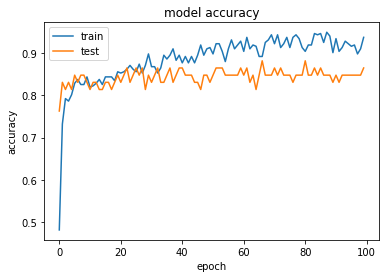

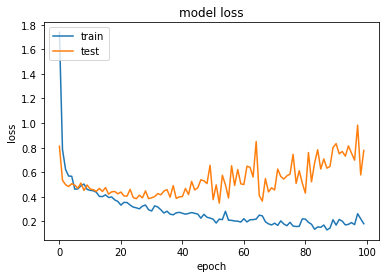

In [30]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    Immature       0.85      1.00      0.92        29
      Mature       1.00      0.30      0.46        10
  Overmature       0.86      0.95      0.90        20

    accuracy                           0.86        59
   macro avg       0.91      0.75      0.76        59
weighted avg       0.88      0.86      0.84        59

